# KMeans Clustering

It is an unsupervised technique used to identify clusters of data objects in the dataset. K specifies the number of clusters.

Steps involved in K-Means Algorithm:

1. Initially choose the number of K clusters.

2. Start with K centroids by putting them at random place (not necessarily from your dataset). **A centroid is a data point (imaginary or real) at the center of a cluster.**

3. Assign each point to the closest centroid. That forms k cluster. Compute distance of every point from centroid.

4. Compute and place the new centroid for each cluster ie., calculate the mean value of the objects for each cluster and update the cluster mean.

5. Repeat the process again ie., reassign each data point to the new closest centroid. If any reassignment took place, go to step 4. But if there is no change ie., when clusters form a clear boundary, then stop.





### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation(retail company using kmc for profit):__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.Subdivision of customers into groups/segments such that each customer segment consists of customers with similar market characteristics — pricing , loyalty, spending behaviors etc. Some of the segmentation variables could be e.g., number of items bought on sale, avg transaction value, total number of transactions. Customer segmentation allows businesses to customize market programs that will be suitable for each of its customer segments

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __Inventory Categorization based on sales or other manufacturing metrics.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.


* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.

### Assumption of K Means:
- Clusters are spatially grouped or spherical
- All features are scaled
- Clusters are of similar size

### Pros:
- Works well even when some assumptions are broken
- Simple and easy to implement
- Easy to interpret

### Cons:

- Sensitive to outliers
- k value has to be known before 

### Goal of Clustering

- Distance between centroid and its point should be minimum
- Intra-cluster distance should be less
- Distance between intercluster should be high

**The sepal and petal of an iris flower are the two parts that make up the flower’s reproductive organs. The sepal is the outermost part of the flower and is responsible for protecting the flower’s reproductive organs. The petal is the innermost part of the flower and is responsible for attracting pollinators to the flower.**

##  Problem :- cluster iris flowers to which they belongs

In [ ]:
# Importing Important library 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline old version plotting require a new tab

In [69]:
# Import inbuild datasets in Pyhton 

In [70]:
from sklearn import datasets
dir(datasets) # List of datasets

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [71]:
# Downloaded load_iris dataset as a name of Flower in the system 
# Reading the flower csv file and save it in 'df' dataframe form
df = pd.read_csv(r'C:\Users\reeta\Downloads\flower.csv')
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


### Basic Checks

In [78]:
# Top 5 records
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [79]:
# Bottom 5 records
df.tail()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2
149,149,5.9,3.0,5.1,1.8,2


In [5]:
# Information  about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


All Variables are of float datatype

In [6]:
# droping unnecessary Columns from dataset
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Discribtion about Numerical type columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


From above description we can see that every variable is approximately symetrcically distributed.

In [17]:
# Null value / Missing value check
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

No missing value in dataset

#### Exploratory Data Analysis

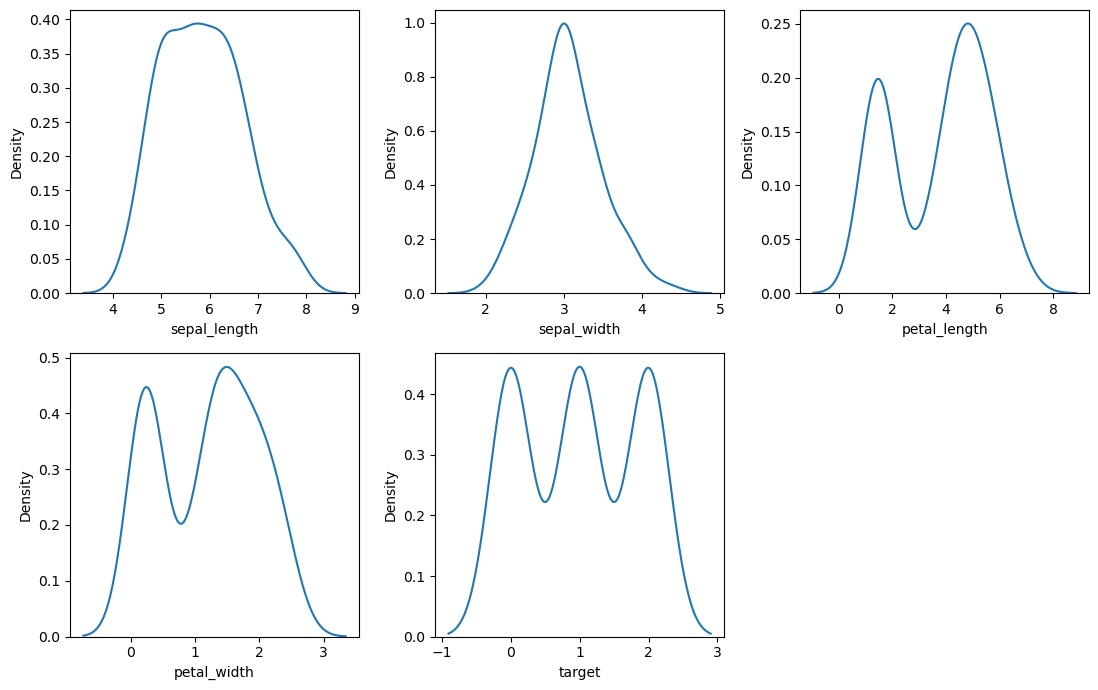

In [61]:
# Desnity Plot of variables 
plt.figure(figsize=(11,7))
plotnumber = 1
for i in df.columns:
    plt.subplot(2,3,plotnumber)
    sns.kdeplot(df[i])
    plotnumber += 1
plt.tight_layout()


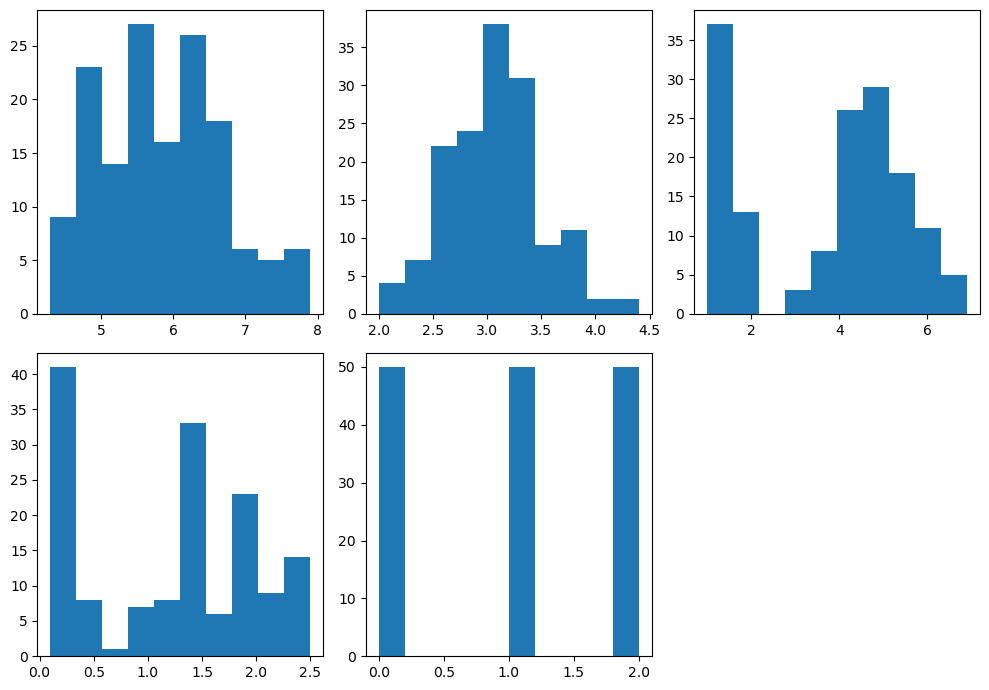

In [18]:
# Desnity Plot of variables 
plt.figure(figsize=(10,7))
plotnumber = 1
for i in df.columns:
    plt.subplot(2,3,plotnumber)
    plt.hist(df[i])
    plotnumber += 1
plt.tight_layout()


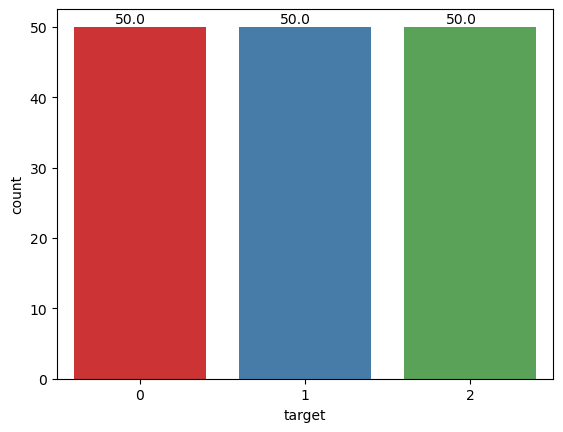

In [31]:
# A countplot can be thought of as a histogram across a categorical, instead of a quantitative variable
ax = sns.countplot(x="target", data=df,palette='Set1')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.5))
plt.show()


Each category of Iris flower has equal number of counts in dataset

Text(0, 0.5, 'petal width')

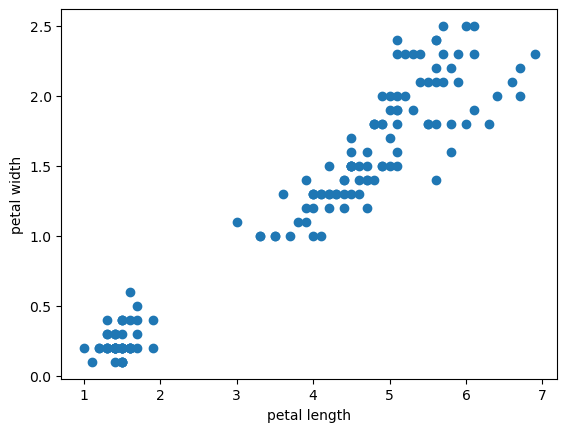

In [55]:
# Bivariate analysis of petal_lenth and petal_width
plt.scatter(df.petal_length,df.petal_width)
plt.xlabel('petal length')
plt.ylabel('petal width')

Here we can see a linear relationship between petal_legth and petal_width of flower

Text(0, 0.5, 'Sepal width')

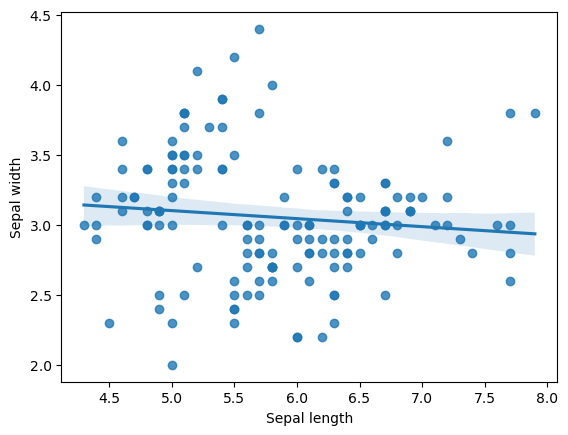

In [49]:
# Bivariate analysis of petal_lenth and petal_width
# Regression plot
sns.regplot(df.sepal_length,df.sepal_width)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Sepal width and Sepal length of flower is not showing any strong relationship

Text(0, 0.5, 'Sepal width')

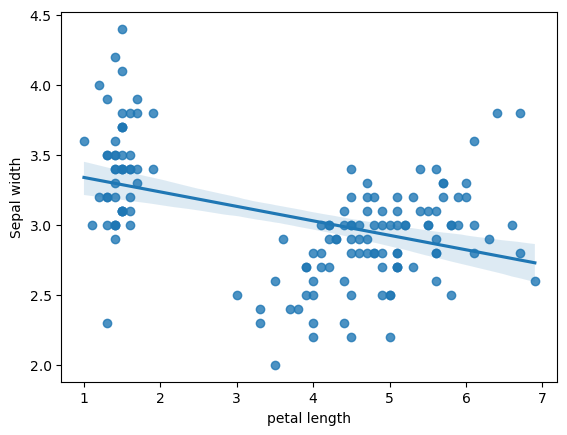

In [47]:
# Bivariate analysis of petal_lenth and petal_width
sns.regplot(df.petal_length,df.sepal_width)
plt.xlabel('petal length')
plt.ylabel('Sepal width')

Petal length and sepal width are showing negative linear reltionship but not so strong.

Text(0, 0.5, 'Sepal length')

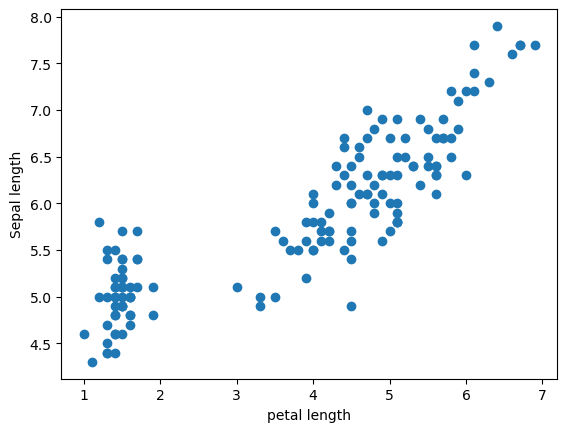

In [39]:
# Bivariate analysis of petal_lenth and petal_width
plt.scatter(df.petal_length,df.sepal_length)
plt.xlabel('petal length')
plt.ylabel('Sepal length')

From above graph as we can see that Sepal Length and petal length are are sharing kind of liner relationship 

Text(0, 0.5, 'petal width')

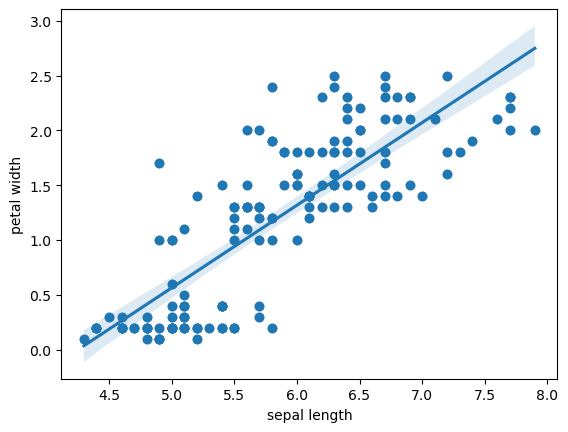

In [43]:
# Bivariate analysis of petal_lenth and petal_width
plt.scatter(df.sepal_length,df.petal_width)
sns.regplot(df.sepal_length,df.petal_width) # Regression plot
plt.xlabel('sepal length')
plt.ylabel('petal width')

Sepal length and petal width are showing Strong positive correlation

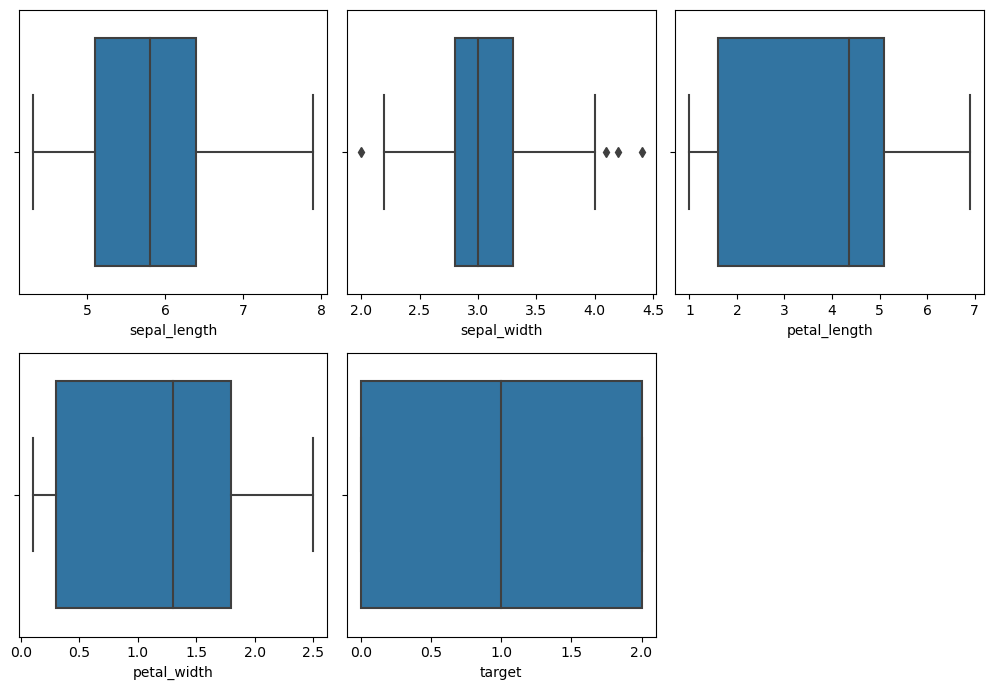

In [51]:
# Outlier detection using box plot
plt.figure(figsize=(10,7))
plotnumber = 1
for i in df.columns:
    plt.subplot(2,3,plotnumber)
    sns.boxplot(df[i])
    plotnumber += 1
plt.tight_layout()


From above box plot analysis we can see that sepal width is showing 4 values as outliers. So we have to treat these Outliers

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

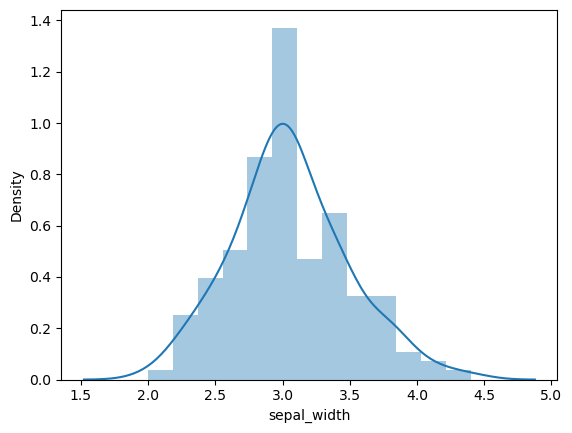

In [62]:
sns.distplot(df.sepal_width)

Here the sepal_width columns in normally distributed that means we have to use empricial formula to calculate the Boundaries and treat outliers.

In [72]:
upper_boundary=df['sepal_width'].mean()+3*df['sepal_width'].std()
lower_boundary=df['sepal_width'].mean()-3*df['sepal_width'].std()
print(lower_boundary)
print(upper_boundary)

1.7532170659134796
4.354782934086522


In [73]:
# Location/Rows which are less than lower boundary
df.loc[df['sepal_width']<lower_boundary]

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target


In [74]:
# Location/rows which are greather than Upper boundary
df.loc[df['sepal_width']>upper_boundary]

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
15,15,5.7,4.4,1.5,0.4,0


In [75]:
# Treating outliers with lower and upper boundries
df.loc[df['sepal_width']>upper_boundary,'sepal_width'] = upper_boundary
df.loc[df['sepal_width']<lower_boundary,'sepal_width'] = lower_boundary

<AxesSubplot:xlabel='sepal_width'>

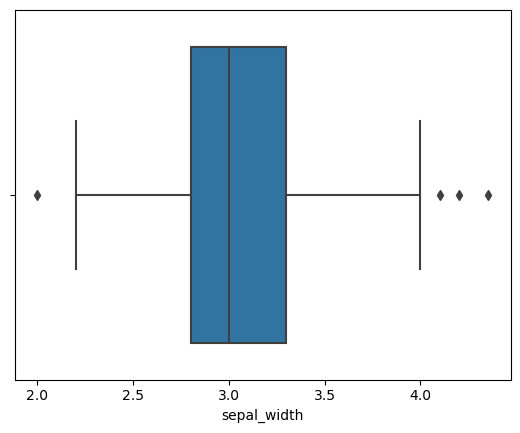

In [76]:
sns.boxplot(df['sepal_width'])

In [67]:
df['sepal_width'].max()

4.354782934086522

In [80]:
# for unsuperwised learning we need no target value so we will drop target variable
x = df.iloc[:,:-1]
x.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


# Building model 

In [81]:
# Import KMeans model from sklearn library
from sklearn.cluster import KMeans
# Initializing the model
model = KMeans(n_clusters=3,random_state=10)
# fitting the model
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [82]:
# labeling for datapoints in x
model.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [83]:
# Label given in Target variable
df.target.unique()

array([0, 1, 2], dtype=int64)

In [84]:
#  4 co-ordinates of Centroid of each clusters
model.cluster_centers_

array([[ 24.        ,   5.00612245,   3.41948537,   1.46530612,
          0.24489796],
       [124.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471],
       [ 73.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ]])

In [80]:
# How do we choose k = 3 only 
# so we now go for Elbow Technique

## Detemining k(Number of Clusters) by using elbow method

In [89]:
# WCSS ( within cluster sum of square for different number of clusters)
WCSS = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k,random_state=10)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)


In [90]:
WCSS # for k =1 t0 10

[281918.20470661105,
 70616.19279143361,
 31365.5030849078,
 17792.98645317543,
 11442.784119622396,
 7917.020522372805,
 5935.550546098217,
 4552.508024412487,
 3580.9915273071156,
 2963.8462661108692]

Text(0, 0.5, 'WCSS')

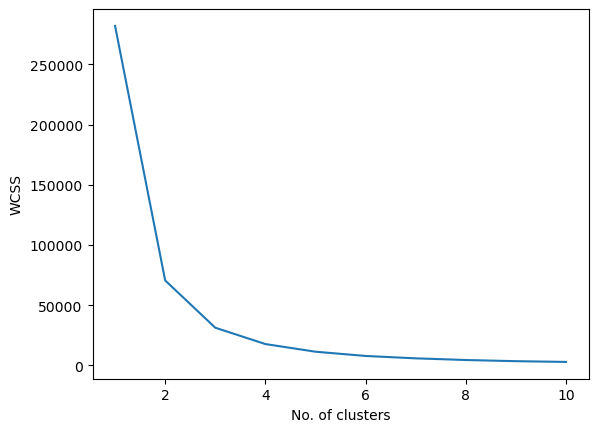

In [91]:
plt.plot(list(range(1,11)),WCSS)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

From above graph analysis we can see that from k = 3 rate of decrement in  WCSS value is slow 
so k = 3 is obtimum value of clusters for this dataset

# Evaluation Metrics

In [92]:
# if silhouette score close close to 1 so data points A FAR away from neighbour cluster
# if silhouette score close close to 0 so data points are very close  to it's  respective own cluster
# if silhouette score close close to -1 so data points assign to wrong cluster
from sklearn.metrics import silhouette_score
s_score = silhouette_score(x,model.labels_)
s_score


0.5816714371328024

## Visualization of clustering done By model and  of Target in original dataset

In [85]:
color1 = np.array(['red','blue','green'])

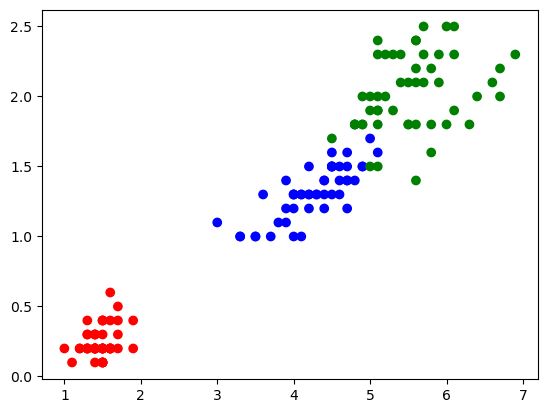

In [87]:
# cluster in original dataset with species
# Visualize the clusters in the original data
plt.scatter(df.petal_length,df.petal_width,color=color1[df.target])

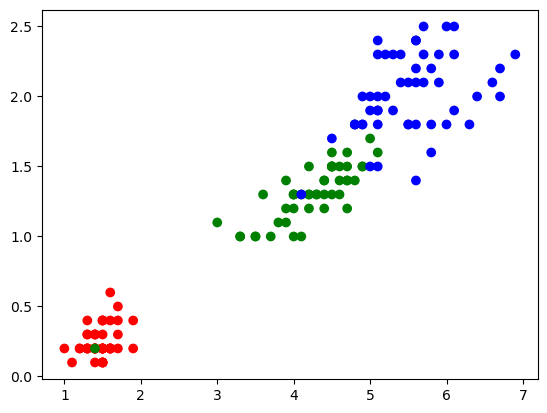

In [88]:
# Visualize the clusters in the original data
plt.scatter(x.petal_length,x.petal_width,color=color1[model.labels_]);

Since our Model done some mistake in separating the groups/clusters, but still it did a good job of separating the different iris flower.